In [10]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('dates.csv')

In [3]:
df.head()

df.columns

X = df.drop(['decision', 'decision_o','match'], axis = 1) # то, с помощью чего предсказываем
y = df['match'] # то, что предсказываем

y.value_counts()

match
0    862
1    186
Name: count, dtype: int64

In [4]:
df.info()

X = pd.get_dummies(X, drop_first = True)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         1048 non-null   object 
 1   age                            1048 non-null   int64  
 2   age_o                          1048 non-null   int64  
 3   field                          1048 non-null   object 
 4   pref_o_attractive              1048 non-null   float64
 5   pref_o_sincere                 1048 non-null   float64
 6   pref_o_intelligence            1048 non-null   float64
 7   pref_o_funny                   1048 non-null   float64
 8   pref_o_ambitious               1048 non-null   float64
 9   pref_o_shared_interests        1048 non-null   float64
 10  attractive_o                   1048 non-null   float64
 11  sinsere_o                      1048 non-null   int64  
 12  intelligence_o                 1048 non-null   f

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 1, test_size = 0.2)

In [6]:
dt = tree.DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred))

0.8


In [8]:
knn = KNeighborsClassifier(n_neighbors = 9)

knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred))

0.8380952380952381


In [9]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[171   2]
 [ 32   5]]


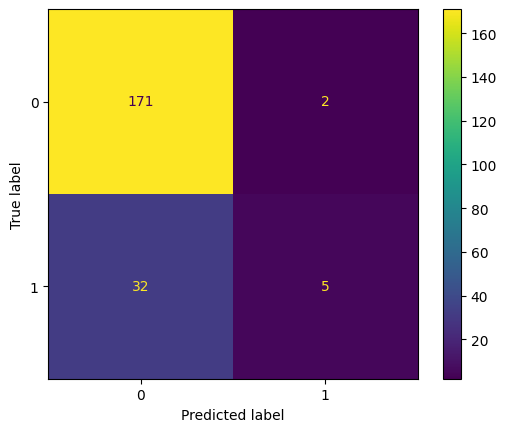

In [11]:

cm = metrics.confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=knn.classes_)
disp.plot()
plt.show()